Descriptive Statistics:
                                     Mean    Median  Standard Deviation  \
ID                             170.000000     170.0           98.005102   
LIMIT_BAL                   166902.654867  140000.0       131496.257148   
SEX                              1.572271       2.0            0.495481   
EDUCATION                        1.784661       2.0            0.760100   
MARRIAGE                         1.628319       2.0            0.513625   
AGE                             34.613569      33.0            9.413948   
PAY_0                            0.058997       0.0            1.072546   
PAY_2                           -0.162242       0.0            1.184312   
BILL_AMT1                    48896.047198   19625.0        69849.721974   
BILL_AMT2                    47521.710914   19342.0        70059.565802   
PAY_AMT1                      4994.640118    2035.0         8800.329575   
PAY_AMT2                      3702.814159    1500.0         6482.933869   
d

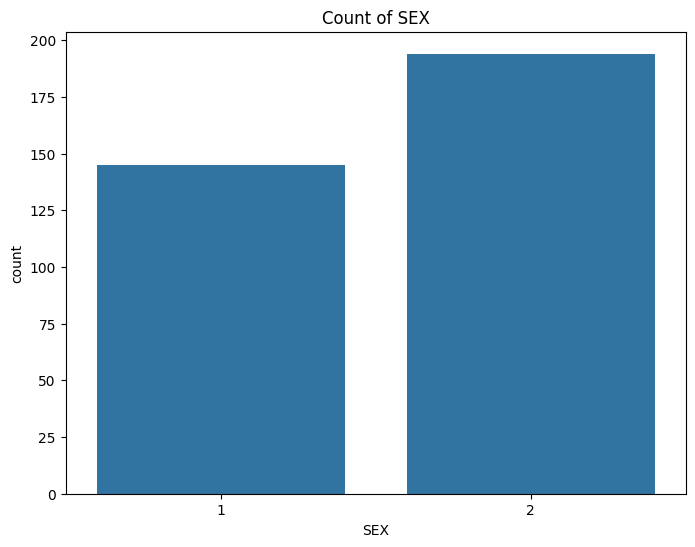

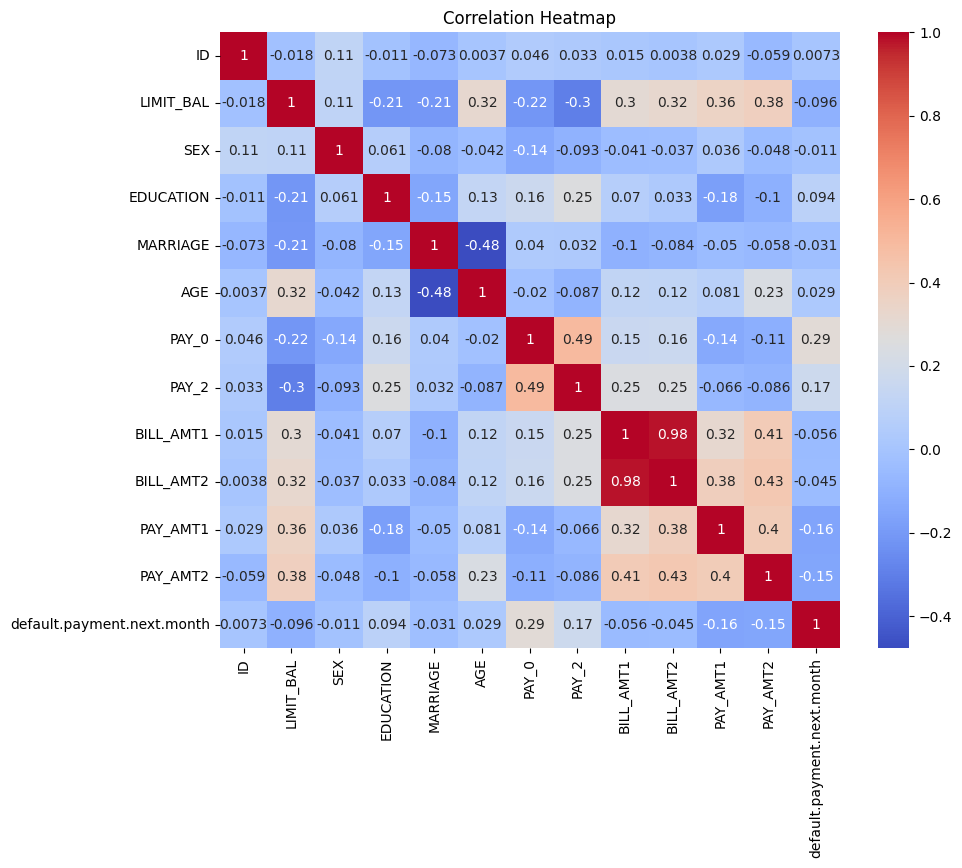

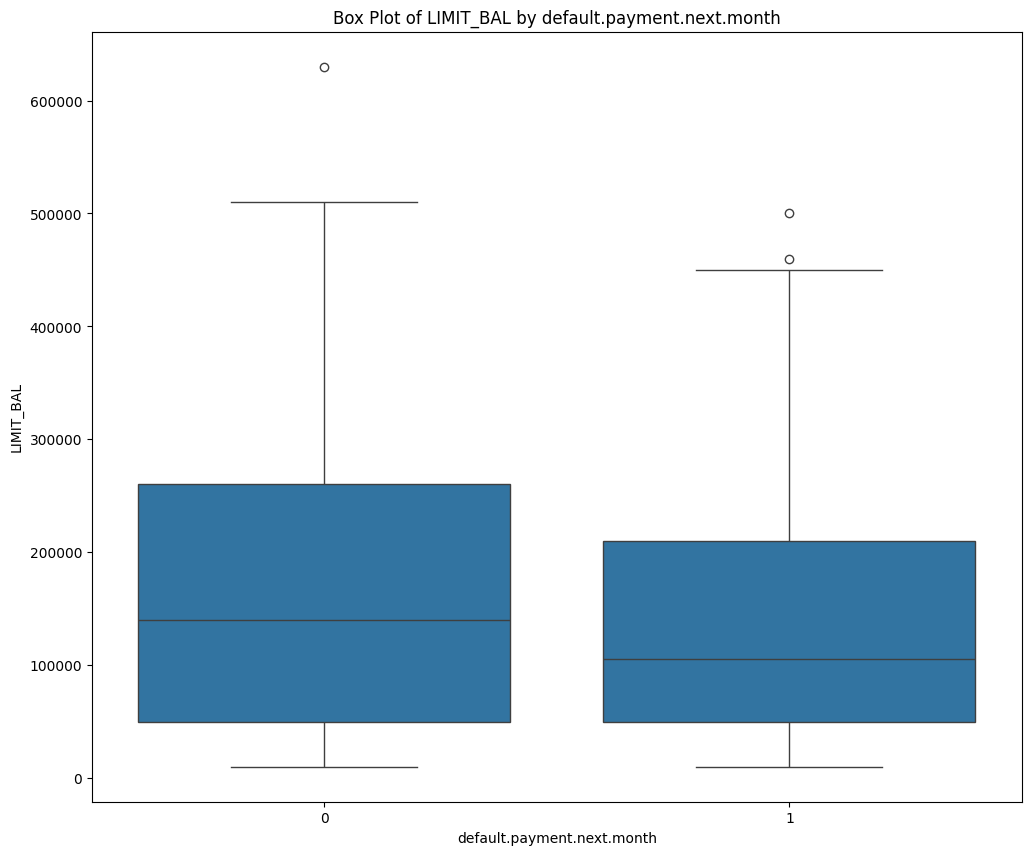

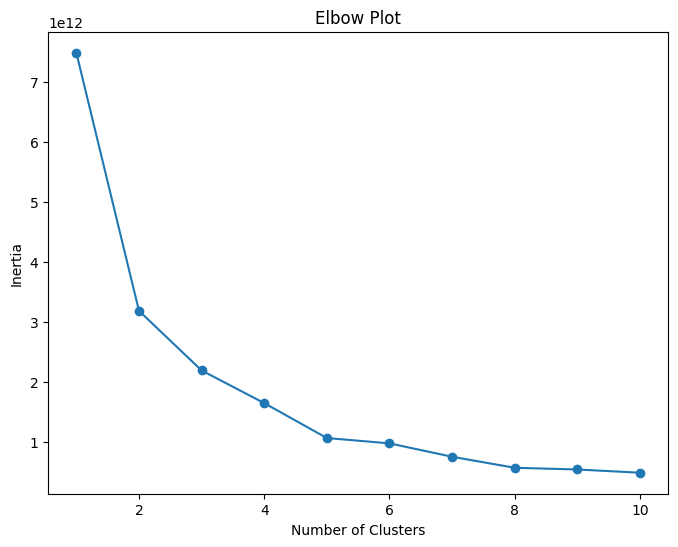

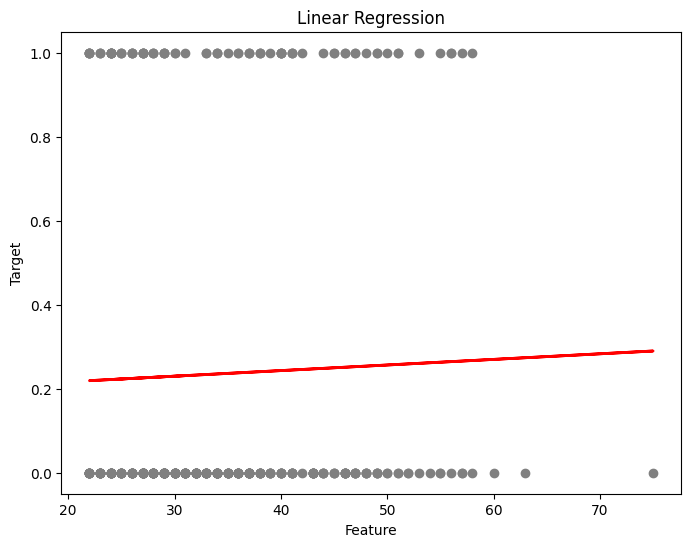

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_samples
from scipy.stats import skew, kurtosis

# Load the Credit Card Default dataset from Kaggle
credit_card = pd.read_csv('UCI_Credit_Card.csv')

# Function to calculate descriptive statistics
def calculate_descriptive_statistics(data):
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    skewness = data.apply(skew)
    kurtosis_val = data.apply(kurtosis)

    statistics = pd.DataFrame({
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurtosis_val
    })

    return statistics

# Function to plot a bar chart
def plot_bar(data, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Count of {column}')
    plt.show()

# Function to plot a heatmap
def plot_heatmap(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Function to plot a box plot
def plot_box(data):
    plt.figure(figsize=(12, 10))
    sns.boxplot(data=data, x='default.payment.next.month', y='LIMIT_BAL')
    plt.title('Box Plot of LIMIT_BAL by default.payment.next.month')
    plt.show()

# Function to plot an elbow plot
def plot_elbow(X):
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertias, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot')
    plt.show()

# Function to perform line fitting
def perform_line_fitting(X, y):
    model = LinearRegression()
    model.fit(X, y)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='gray')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.title('Linear Regression')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.show()

# Main function
def main():
    # Descriptive Statistics
    print("Descriptive Statistics:")
    print(calculate_descriptive_statistics(credit_card.select_dtypes(include=[np.number])))

    # Plot 1: Bar Chart
    plot_bar(credit_card, 'SEX')

    # Plot 2: Heatmap
    plot_heatmap(credit_card)

    # Plot 3: Corner Plot
    plot_box(credit_card[['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'default.payment.next.month']])

    # Plot 4: Elbow Plot for K-means Clustering
    X = credit_card[['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1']].values
    plot_elbow(X)

    # Plot 5: Line Fitting
    X_age = credit_card['AGE'].values.reshape(-1, 1)
    y_default = credit_card['default.payment.next.month'].values
    perform_line_fitting(X_age, y_default)

if __name__ == "__main__":
    main()